# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from __future__ import unicode_literals

In [2]:
%matplotlib notebook

# Loading Dataset

In [3]:
my_data = np.loadtxt('../Catalogue/Match07_small_mags_doubleclean.csv', delimiter=',', dtype=str)

In [4]:
my_dictionary = {}
for i in range(len(my_data[0, :])):                                         # Converting numpy array into dictionary
    my_dictionary[my_data[0, i]] = np.array(my_data[0 + 1:, i], dtype=str)

In [5]:
print my_data.shape
print my_data.size
print my_data[0,:]

(21307, 161)
3430427
['CATAID' 'OBJID_SDSSDR7' 'ALPHA_J2000' 'DELTA_J2000' 'KRON_RADIUS'
 'PETRO_RADIUS' 'MAG_PETRO_u' 'MAGERR_PETRO_u' 'FLAGS_u' 'MAG_PETRO_g'
 'MAGERR_PETRO_g' 'FLAGS_g' 'MAG_PETRO_r' 'MAGERR_PETRO_r' 'FLAGS_r'
 'MAG_PETRO_i' 'MAGERR_PETRO_i' 'FLAGS_i' 'MAG_PETRO_z' 'MAGERR_PETRO_z'
 'FLAGS_z' 'MAG_PETRO_X' 'MAGERR_PETRO_X' 'FLAGS_X' 'MAG_PETRO_Y'
 'MAGERR_PETRO_Y' 'FLAGS_Y' 'MAG_PETRO_J' 'MAGERR_PETRO_J' 'FLAGS_J'
 'MAG_PETRO_H' 'MAGERR_PETRO_H' 'FLAGS_H' 'MAG_PETRO_K' 'MAGERR_PETRO_K'
 'FLAGS_K' 'FLAGS' 'PSFMAG_R' 'FIBERMAG_R' 'FLAGS_R_SDSS' 'PETRORAD_R'
 'PETROR90_R' 'PETROR50_R' 'PETROMAG_R' 'MODELMAG_U' 'MODELMAG_G'
 'MODELMAG_R' 'MODELMAG_I' 'MODELMAG_Z' 'STATUS' 'BEST_MAG_NUV'
 'BEST_MAGERR_NUV' 'BEST_MAG_FUV' 'BEST_MAGERR_FUV' 'BEST_METHOD'
 'NMATCHUV' 'NMATCHOPT' 'NUVFLAG' 'FUVFLAG' 'NN_DIST' 'NN_NMATCH4'
 'NN_MANY2ONE' 'NN_SFLAGS_NUV' 'NN_SFLAGS_FUV' 'KCORR_FUV' 'KCORR_NUV'
 'KCORR_U' 'KCORR_G' 'KCORR_R' 'KCORR_I' 'KCORR_Z' 'KCORR_Y' 'KCORR_J'
 'KCORR_H' 'KC

In [6]:
redshift     = my_dictionary['Z'].astype(float)
z_prob       = my_dictionary['PROB'].astype(float)
z_quality    = my_dictionary['NQ'].astype(int)
fuv_band     = my_dictionary['MAG_AB_FUV'].astype(float)   
nuv_band     = my_dictionary['MAG_AB_NUV'].astype(float)
u_band       = my_dictionary['MAG_AB_U'].astype(float)
g_band       = my_dictionary['MAG_AB_G'].astype(float)
r_band       = my_dictionary['MAG_AB_R'].astype(float)
mag_abs_r    = my_dictionary['MAG_ABSOLUTE_R'].astype(float)
stellar_mass = my_dictionary['logmstar'].astype(float)   # stellar mass from sed fitting - log scale
stellar_age  = my_dictionary['logage'].astype(float)     # stellar age - log scale
stellar_met  = my_dictionary['metal'].astype(float)      # stellar metallicity
dn4000       = my_dictionary['D4000N'].astype(float)     
h_alpha_flux = my_dictionary['HA_FLUX_COMP'].astype(float)    
h_alpha_ew   = my_dictionary['HA_EW_COMP'].astype(float)      
h_beta_flux  = my_dictionary['HB_FLUX_COMP'].astype(float)    
h_beta_ew    = my_dictionary['HB_EW_COMP'].astype(float)      
nii_flux     = my_dictionary['NIIR_FLUX_COMP'].astype(float)  # R for red or 6583A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
oiii_flux    = my_dictionary['OIIIR_EW_COMP'].astype(float)   # R for red or 5007A -- see http://www.gama-survey.org/dr3/schema/dmu.php?id=8
uv_class     = my_dictionary['UV_CLASS_YI2011'].astype(str)

In [7]:
print np.unique(uv_class)

['RSF' 'UV_UPTURN' 'UV_WEAK']


### Redshift volume on which I intend to focus my analysis

In [8]:
z_min=0.06
z_max=0.40

### Selecting the subsample

In [9]:
indexes = np.arange(redshift.size)

In [10]:
index_all = indexes[(r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*((fuv_band-nuv_band)<50)
                     *((fuv_band-nuv_band)>(-20))*(redshift>=z_min)]

In [11]:
print redshift[index_all].size

18107


# Characterizing the UV emission of the Galaxies
    

### Indices - UV upturn; UV weak; RSF; red sequence galaxies

In [12]:
index_uvup = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                      *(fuv_band-nuv_band<0.9)*(fuv_band-r_band<6.6)*(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)
                      *(redshift>=z_min))

In [13]:
index_rsf = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band - r_band)<5.4)
                     *(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min))

In [14]:
index_uvweak = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band - r_band) > 5.4)
                        *((fuv_band-r_band)>6.6)*(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min))

In [15]:
index_redsequence = np.where(((r_band>0)*(r_band<19.8)*(nuv_band>0)*(fuv_band>0)*(nuv_band-r_band)>5.4)
                             *(fuv_band-nuv_band<50)*(fuv_band-nuv_band>-20)*(redshift>=z_min))

# Plot 01: Yi et al. (2011) UV diagnosis plot

<IPython.core.display.Javascript object>


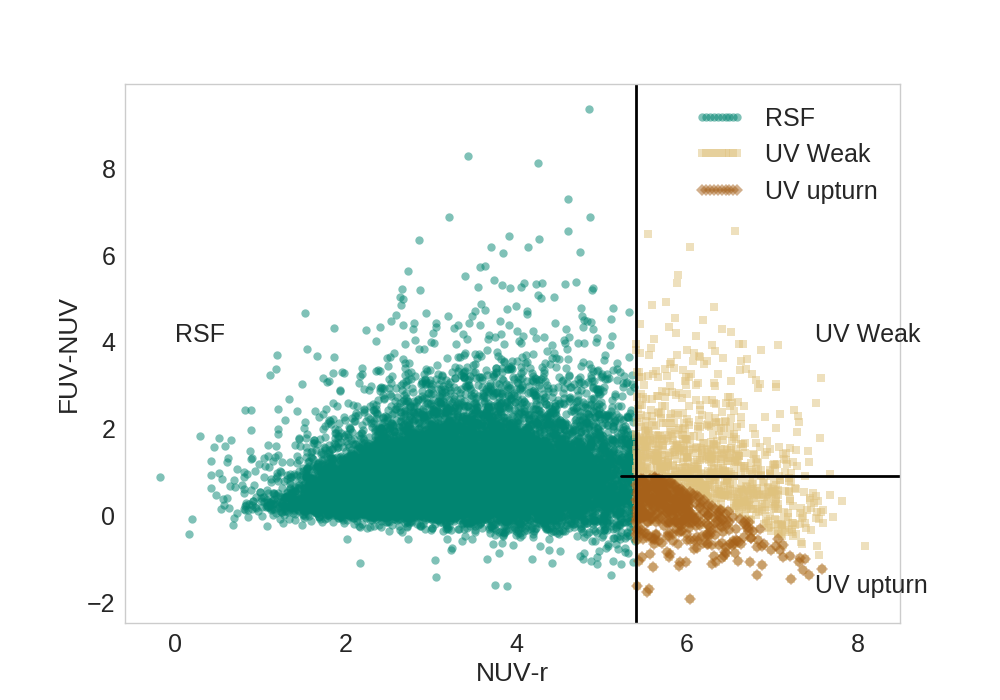

In [16]:
sns.set_style("whitegrid")
plt.subplots(1,1, figsize=(10,7))
plot01, = plt.plot((nuv_band - r_band)[index_rsf], (fuv_band - nuv_band)[index_rsf], 'o', markersize=6, 
                   color = '#018571', alpha=0.5, label="RSF")
plot02, = plt.plot((nuv_band - r_band)[index_redsequence], (fuv_band - nuv_band)[index_redsequence], 's', 
                   markersize=6, color = '#dfc27d', alpha=0.5, label="UV Weak")
plot03, = plt.plot((nuv_band - r_band)[index_uvup], (fuv_band - nuv_band)[index_uvup], 'D', markersize=6, 
                   color = '#a6611a', alpha=0.5, label="UV upturn")
plt.legend(numpoints=10, loc='best', fontsize=18)
plt.text(0.0, 4, r"RSF", fontsize=18)
plt.text(7.5, 4, r"UV Weak", fontsize=18)
plt.text(7.5, -1.8, r"UV upturn", fontsize=18)
plt.axvline(x=5.4, color='black', linewidth=2.)
plt.axhline(y=0.9, xmin=0.64, xmax=1, color='black', linewidth=2.)
plt.xlabel("NUV-r", fontsize=19)
plt.ylabel("FUV-NUV", fontsize=19)
plt.tick_params('both', labelsize='18')
plt.grid(alpha=0.00)
plt.savefig('../Figs/g2_maglim_yi_diagram.pdf')
plt.savefig('../Figs/g2_maglim_yi_diagram.png')
plt.show()

# Characterizing the emission-lines profile of these objects

### BPT

In [27]:
xbpt_k01 = np.linspace(-2.2, 0.4, 1000)     # Kewyley et al. 2001
xbpt_k03 = np.linspace(-2.2, -0.01, 1000)   # Kaufmann et al. 2003
xbpt_s06 = np.linspace(-2.2, -0.05, 1000)   # Stasinska et al. 2006
xbpt_s07 = np.linspace(-0.182, 2.0, 1000)   # Schawinski et al. 2007

In [28]:
ybpt_k01 = []
for j in range(len(xbpt_k01)):
    ybpt_k01j = 0.61 / (xbpt_k01[j] - 0.47) + 1.19  # Kewyley et al. 2001
    ybpt_k01.append(ybpt_k01j)
ybpt_k01 = np.array(ybpt_k01)

In [29]:
ybpt_k03 = []
for j in range(len(xbpt_k03)):
    ybpt_k03j = 0.61 / (xbpt_k03[j] - 0.05) + 1.3  # Kaufmann et al. 2003
    ybpt_k03.append(ybpt_k03j)
ybpt_k03 = np.array(ybpt_k03)

In [30]:
ybpt_s06 = []
for j in range(len(xbpt_s06)):
    # Stasinska et al. 2006
    ybpt_s06j = (-30.787 + (1.1358 * xbpt_s06[j]) + 0.27297) * np.tanh(5.7409 * xbpt_s06[j]) - 31.093 
    ybpt_s06.append(ybpt_s06j)
ybpt_s06 = np.array(ybpt_s06)

In [31]:
ybpt_s07 = []
for j in range(len(xbpt_s07)):
    ybpt_s07j = 1.05 * xbpt_s07[j] + 0.45    # Schawinski et al. 2007 
    ybpt_s07.append(ybpt_s07j)
ybpt_s07 = np.array(ybpt_s07)

### New indices for emission lines - cleaning the trash

In [32]:
print np.unique(np.isnan(h_alpha_flux[index_all]))               #is there any NAN value?
print np.unique(np.isinf(h_alpha_flux[index_all]))               #is there any infinite value?
print h_alpha_flux[index_all][[h_alpha_flux[index_all]==0]].size #total amount of zeroes
print h_alpha_flux[index_all].size                               #total size of the sample
print h_alpha_flux[index_all].size - h_alpha_flux[index_all][[h_alpha_flux[index_all]==0]].size #removing the zeroes

[False]
[False]
265
18107
17842


In [33]:
idx_bpt_clean = np.where((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                           *(np.logical_not(np.isnan(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(np.isinf(np.log10(oiii_flux[index_all]/h_beta_flux[index_all]))))
                           *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(h_beta_flux[index_all]<=0))
                           *(np.logical_not(nii_flux[index_all]<=0))*(np.logical_not(oiii_flux[index_all]<=0)))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [34]:
idx_whan_clean = np.where((np.logical_not(np.isnan(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(nii_flux[index_all]/h_alpha_flux[index_all]))))
                          *(np.logical_not(np.isnan(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(np.isinf(np.log10(h_alpha_ew[index_all]))))
                          *(np.logical_not(h_alpha_flux[index_all]<=0))*(np.logical_not(nii_flux[index_all]<=0))
                          *(np.logical_not(h_alpha_ew[index_all]<=0)))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [35]:
print h_alpha_flux[index_all][idx_bpt_clean].size
print h_alpha_flux[index_all][idx_whan_clean].size

14217
16323


In [36]:
# for i in range(h_alpha_flux[index_all][idx_bpt_clean].size):
#     print h_alpha_flux[index_all][idx_bpt_clean][i]

### Creating new arrays of clean h alpha, h beta, nii, oiii to simplify the notation

#### BPT

In [37]:
h_alpha_flux_bpt = h_alpha_flux[index_all][idx_bpt_clean]
h_beta_flux_bpt  = h_beta_flux[index_all][idx_bpt_clean]
nii_flux_bpt     = nii_flux[index_all][idx_bpt_clean]
oiii_flux_bpt    = oiii_flux[index_all][idx_bpt_clean]
uv_class_bpt     = uv_class[index_all][idx_bpt_clean]

In [38]:
print h_alpha_flux_bpt.size
print uv_class_bpt.size

14217
14217


In [39]:
print np.unique(uv_class_bpt)

['RSF' 'UV_UPTURN' 'UV_WEAK']


In [40]:
idx_uvup_bpt = np.where(uv_class_bpt=='UV_UPTURN')

In [41]:
idx_uvwk_bpt = np.where(uv_class_bpt=='UV_WEAK')

In [42]:
idx_rsf_bpt = np.where(uv_class_bpt=='RSF')

#### WHAN

In [43]:
h_alpha_flux_whan = h_alpha_flux[index_all][idx_whan_clean]
h_beta_flux_whan  = h_beta_flux[index_all][idx_whan_clean]
nii_flux_whan     = nii_flux[index_all][idx_whan_clean]
h_alpha_ew_whan   = h_alpha_ew[index_all][idx_whan_clean]
uv_class_whan     = uv_class[index_all][idx_whan_clean]

In [44]:
print h_alpha_flux_whan.size
print uv_class_whan.size

16323
16323


In [45]:
print np.unique(uv_class_whan)

['RSF' 'UV_UPTURN' 'UV_WEAK']


In [46]:
idx_uvup_whan = np.where(uv_class_whan=='UV_UPTURN')

In [47]:
idx_uvwk_whan = np.where(uv_class_whan=='UV_WEAK')

In [48]:
idx_rsf_whan = np.where(uv_class_whan=='RSF')

### All BPT settings

#### X-axis

In [49]:
xbpt = np.log10(nii_flux_bpt/h_alpha_flux_bpt)

In [50]:
xbpt_uvup = np.log10(nii_flux_bpt[idx_uvup_bpt]/h_alpha_flux_bpt[idx_uvup_bpt])
xbpt_uvwk = np.log10(nii_flux_bpt[idx_uvwk_bpt]/h_alpha_flux_bpt[idx_uvwk_bpt])
xbpt_rsf  = np.log10(nii_flux_bpt[idx_rsf_bpt]/h_alpha_flux_bpt[idx_rsf_bpt])

#### Y-axis

In [51]:
ybpt = np.log10(oiii_flux_bpt/h_beta_flux_bpt)

In [52]:
ybpt_uvup = np.log10(oiii_flux_bpt[idx_uvup_bpt]/h_beta_flux_bpt[idx_uvup_bpt])
ybpt_uvwk = np.log10(oiii_flux_bpt[idx_uvwk_bpt]/h_beta_flux_bpt[idx_uvwk_bpt])
ybpt_rsf  = np.log10(oiii_flux_bpt[idx_rsf_bpt]/h_beta_flux_bpt[idx_rsf_bpt])

### All WHAN settings

#### X-axis

In [53]:
xwhan = np.log10(nii_flux_whan/h_alpha_flux_whan)

In [54]:
xwhan_uvup = np.log10(nii_flux_whan[idx_uvup_whan]/h_alpha_flux_whan[idx_uvup_whan])
xwhan_uvwk = np.log10(nii_flux_whan[idx_uvwk_whan]/h_alpha_flux_whan[idx_uvwk_whan])
xwhan_rsf  = np.log10(nii_flux_whan[idx_rsf_whan]/h_alpha_flux_whan[idx_rsf_whan])

#### Y-axis

In [55]:
ywhan = np.log10(h_alpha_ew_whan)

In [56]:
ywhan_uvup = np.log10(h_alpha_ew_whan[idx_uvup_whan])
ywhan_uvwk = np.log10(h_alpha_ew_whan[idx_uvwk_whan])
ywhan_rsf  = np.log10(h_alpha_ew_whan[idx_rsf_whan])

In [57]:
print xbpt_rsf.size, ybpt_rsf.size
print xwhan_rsf.size, ywhan_rsf.size

13757 13757
15352 15352


In [58]:
print xwhan.size
print (xwhan_uvup.size+xwhan_uvwk.size+xwhan_rsf.size)

16323
16323


# Plot 02: BPT and WHAN

<IPython.core.display.Javascript object>


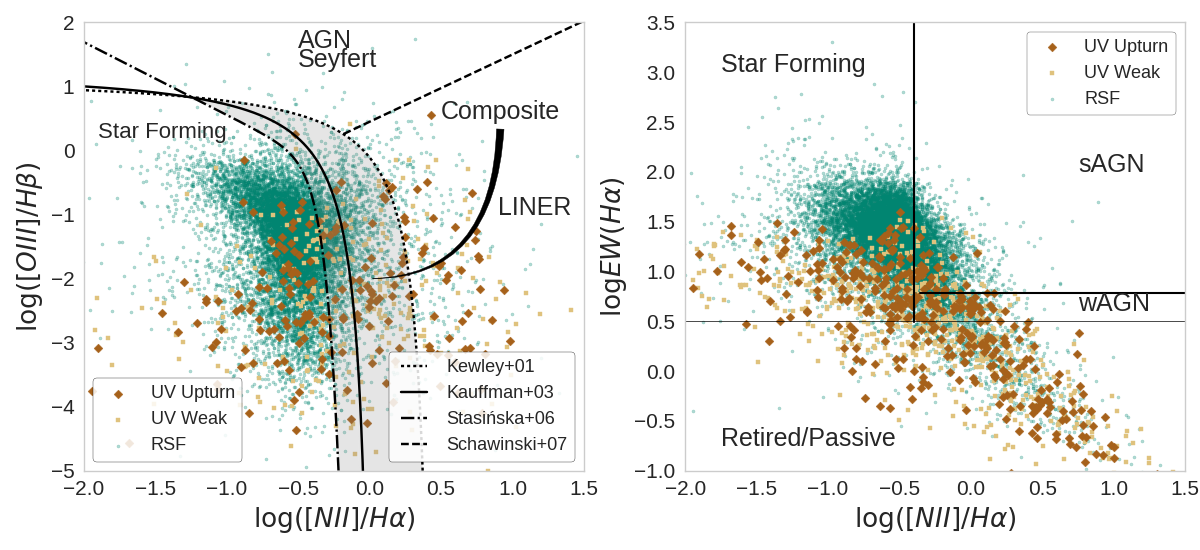

In [59]:
# FIRST PLOT -- BPT
plt.subplots(figsize=(12,5.5))
plt.subplot(1,2,1)
plot01c = plt.scatter(xbpt_rsf, ybpt_rsf, c='#018571', s=5, alpha=0.3, marker='o')
plot01b = plt.scatter(xbpt_uvwk, ybpt_uvwk, c='#dfc27d', s=10, alpha=1, marker='s')
plot01a = plt.scatter(xbpt_uvup, ybpt_uvup, c='#a6611a', s=20, alpha=1, marker='D')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
l1 = plt.legend([plot01a, plot01b, plot01c], [r"UV Upturn", r"UV Weak", r"RSF"], numpoints=500, loc='lower left', 
           fontsize=13, frameon=True, framealpha=0.85)
l2 = plt.legend([plot02, plot03, plot04, plot05], [r"Kewley+01", r"Kauffman+03", r"Stasińska+06", r"Schawinski+07"],
          numpoints=3, loc='lower right', fontsize=13, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')
l2.get_frame().set_edgecolor('black')
plt.gca().add_artist(l1)

plt.fill_betweenx(ybpt_k01, xbpt_k01, xbpt_s06, where=(xbpt_s06>-1.242)*(ybpt_s06<0.835), facecolor='gray', alpha=0.2)
plt.fill_between(xbpt_s06, ybpt_k01, ybpt_s06, where=(xbpt_s06>-1.242)*(ybpt_k01<0.835), facecolor='gray', alpha=0.2)
plt.xlabel(r"$\log ([NII]/H{\alpha})$", fontweight='bold', size=19)
plt.ylabel(r"$\log (\left[OIII\right]/H \beta) $", fontweight='bold', fontsize=19)
plt.text(-1.9, 0.2, r"Star Forming", fontsize=16)
plt.text(-0.5, 1.6, r"AGN", fontsize=18)
plt.text(-0.5, 1.3, r"Seyfert", fontsize=18)
# plt.text(1., 0.1, r"AGN(?)", fontsize=12)
plt.text(0.9, -1, r"LINER", fontsize=18)
plt.annotate(r"Composite", xy=(0., -2), xycoords='data', xytext=(0.5, 0.5), size=18,                 
#              bbox=dict(boxstyle="square", facecolor="1."), 
             arrowprops=dict(arrowstyle='wedge',facecolor='black', connectionstyle="angle3,angleA=90,angleB=0"))

# plt.text(-0.06, -4., r"Composite", fontsize=18)
plt.xlim([-2, 1.5])
plt.ylim([-5, 2])
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.grid(alpha=0.0)

# SECOND PLOT -- WHAN DIAGRAM
plt.subplot(1,2,2)
plot01c = plt.scatter(xwhan_rsf, ywhan_rsf,   c='#018571', s=5,  alpha=0.3, marker='o')
plot01b = plt.scatter(xwhan_uvwk, ywhan_uvwk, c='#dfc27d', s=10, alpha=1, marker='s')
plot01a = plt.scatter(xwhan_uvup, ywhan_uvup, c='#a6611a', s=20, alpha=1, marker='D')
l3 = plt.legend([plot01a, plot01b, plot01c], [r"UV Upturn", r"UV Weak", r"RSF"],numpoints=500, loc='upper right', 
           fontsize=13, frameon=True, framealpha=0.7)
l3.get_frame().set_edgecolor('black')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.78, xmin=0.469, xmax=1, color='black', linewidth=1.5)
plt.xlabel(r"$\log ([NII]/H{\alpha})$", fontweight='bold', fontsize=19)
plt.ylabel(r"$\log EW(H{\alpha})$", fontweight='bold', fontsize=19)
plt.text(-1.75, -0.75, r"Retired/Passive", fontsize=18)
plt.text(0.75, 2.0, r"sAGN", fontsize=18)
plt.text(0.75, 0.6, r"wAGN", fontsize=18)
plt.text(-1.75, 3, r"Star Forming", fontsize=18)
plt.xlim([-2, 1.5])
plt.ylim([-1.0, 3.5])
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.grid(alpha=0.0)

plt.tight_layout()
plt.savefig('../Figs/g2_bptwhan.pdf')
plt.savefig('../Figs/g2_bptwhan.png')

plt.show()

# Plot 03: BPT and WHAN fragmented

<IPython.core.display.Javascript object>


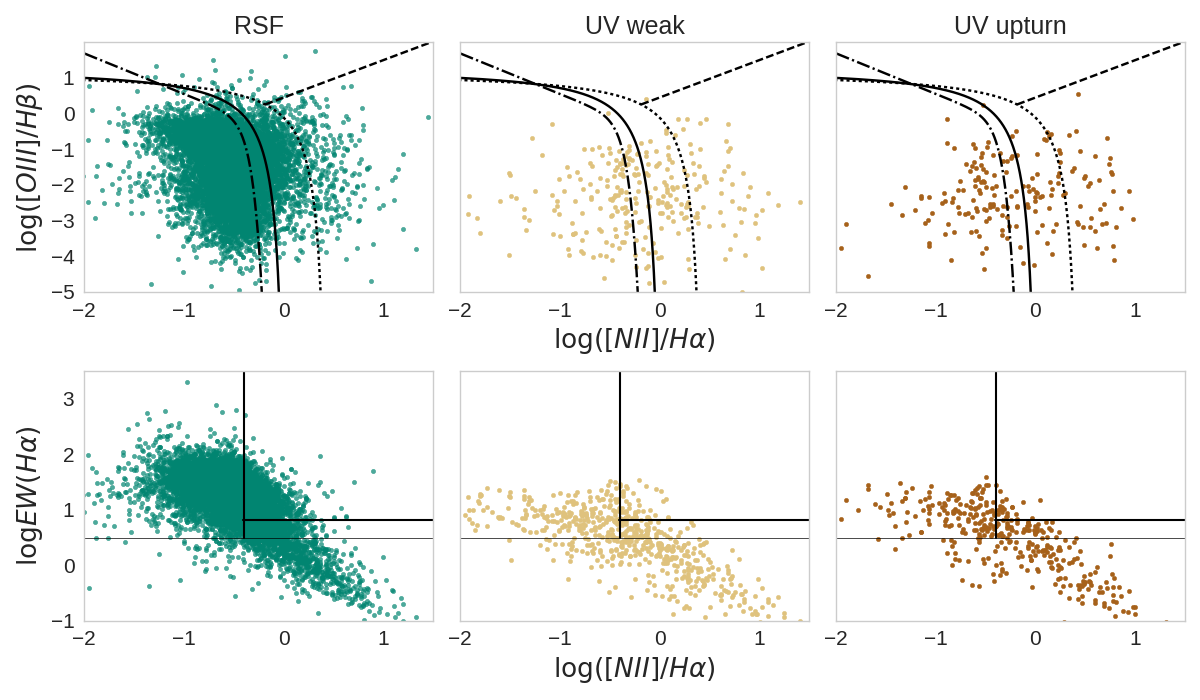

In [65]:
# OVERALL SETTINGS
plt.subplots(figsize=(12,7))
bpt_xlim  = [-2, 1.5]
bpt_ylim  = [-5, 2]
whan_xlim = [-2, 1.5]
whan_ylim = [-1.0, 3.5]

# BPT
## RSF
ax1=plt.subplot(2,3,1)
plot01c = plt.scatter(xbpt_rsf, ybpt_rsf, c='#018571', s=10, alpha=0.7, label='RSF')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.ylabel(r"$\log (\left[OIII\right]/H \beta) $", fontweight='bold', fontsize=19)
# plt.legend([plot01c], [r"RSF"], numpoints=500, loc='upper right', fontsize=10, frameon=True, framealpha=1.)
plt.title("RSF", fontsize=18)
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.yticks(np.arange(bpt_ylim[0], bpt_ylim[1], 1.))
plt.grid(alpha=0.0)


## UV Weak
ax2=plt.subplot(2,3,2)
plot01b = plt.scatter(xbpt_uvwk, ybpt_uvwk, c='#dfc27d', s=10, alpha=1, label='UV weak')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.xlabel(r"$\log ([NII]/H{\alpha})$", fontweight='bold', size=19)
plt.title("UV weak", fontsize=18)
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
ax2.yaxis.set_visible(False)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.grid(alpha=0.0)


## UV Upturn
ax3=plt.subplot(2,3,3)
plot01a = plt.scatter(xbpt_uvup, ybpt_uvup, c='#a6611a', s=10, alpha=1, label='UV upturn')
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.title("UV upturn", fontsize=18)
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
ax3.yaxis.set_visible(False)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.grid(alpha=0.0)

# WHAN 
## RSF
ax4=plt.subplot(2,3,4)
plot01c = plt.scatter(xwhan_rsf, ywhan_rsf,   c='#018571', s=10,  alpha=0.7, label='RSF')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.ylabel(r"$\log EW(H{\alpha})$", fontweight='bold', fontsize=19)
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))
plt.yticks(np.arange(whan_ylim[0], whan_ylim[1], 1.))
plt.grid(alpha=0.0)

ax5=plt.subplot(2,3,5)
plot01b = plt.scatter(xwhan_uvwk, ywhan_uvwk, c='#dfc27d', s=10, alpha=1, label='UV weak')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.xlabel(r"$\log ([NII]/H{\alpha})$", fontweight='bold', size=19)
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
ax5.yaxis.set_visible(False)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))
plt.grid(alpha=0.0)

ax6=plt.subplot(2,3,6)
plot01a = plt.scatter(xwhan_uvup, ywhan_uvup, c='#a6611a', s=10, alpha=1, label='UV upturn')
plt.axvline(x=-0.4, ymin=.332, ymax=3.5, color='black', linewidth=1.5)
plt.axhline(y=+0.5, color='black', linewidth=0.5)
plt.axhline(y=0.82, xmin=0.455, xmax=1, color='black', linewidth=1.5)
plt.xlim(whan_xlim)
plt.ylim(whan_ylim)
ax6.yaxis.set_visible(False)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(whan_xlim[0], whan_xlim[1], 1.))
plt.grid(alpha=0.0)

plt.tight_layout()
plt.savefig('../Figs/g2_bptwhan_split.pdf')
plt.savefig('../Figs/g2_bptwhan_split.png')
plt.show()

## Analysing the impact of the cross-correlation between BPT, WHAN and UV classes

In [66]:
print xbpt.size
print xwhan.size

14217
16323


In [67]:
whan_class = []
for i in range(xwhan.size):
    if (xwhan[i]<-0.4)*(ywhan[i]>0.5):
        whan_class_i = 'SF'
    elif (xwhan[i]>-0.4)*(ywhan[i]>0.82):
        whan_class_i = 'sAGN'
    elif (xwhan[i]>-0.4)*(ywhan[i]<0.82)*(ywhan[i]>0.5):
        whan_class_i = 'wAGN'
    elif (ywhan[i]<0.5):
        whan_class_i = 'Retired/Passive'    
    else:
        print 'error'
    
    whan_class.append(whan_class_i)
whan_class = np.array(whan_class)

In [68]:
idx_sf   = np.where(whan_class=='SF')
idx_sagn = np.where(whan_class=='sAGN')
idx_wagn = np.where(whan_class=='wAGN')
idx_rp   = np.where(whan_class=='Retired/Passive')

##### I now have both classifications: UV and WHAN. Let's crossmatch these informations and count the amount of galaxies in each situation.

In [69]:
print r"RSF objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('RSF')
print r"UV weak objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('UV_WEAK')
print r"UV upturn objects in SF region in WHAN diagram is %d" % list(uv_class_whan[idx_sf]).count('UV_UPTURN')

RSF objects in SF region in WHAN diagram is 10956
UV weak objects in SF region in WHAN diagram is 204
UV upturn objects in SF region in WHAN diagram is 137


In [70]:
print r"RSF objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('RSF')
print r"UV weak objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('UV_WEAK')
print r"UV upturn objects in sAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_sagn]).count('UV_UPTURN')

RSF objects in sAGN region in WHAN diagram is 2820
UV weak objects in sAGN region in WHAN diagram is 47
UV upturn objects in sAGN region in WHAN diagram is 24


In [71]:
print r"RSF objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('RSF')
print r"UV weak objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('UV_WEAK')
print r"UV upturn objects in wAGN region in WHAN diagram is %d" % list(uv_class_whan[idx_wagn]).count('UV_UPTURN')

RSF objects in wAGN region in WHAN diagram is 718
UV weak objects in wAGN region in WHAN diagram is 59
UV upturn objects in wAGN region in WHAN diagram is 48


In [72]:
print r"RSF objects in Retired/Passive region in WHAN diagram is %d" % list(uv_class_whan[idx_rp]).count('RSF')
print r"UV weak objects in Retired/Passive region in WHAN diagram is %d" % list(uv_class_whan[idx_rp]).count('UV_WEAK')
print r"UV upturn objects in Retired/Passive region in WHAN diagram is %d" % list(uv_class_whan[idx_rp]).count('UV_UPTURN')

RSF objects in Retired/Passive region in WHAN diagram is 858
UV weak objects in Retired/Passive region in WHAN diagram is 296
UV upturn objects in Retired/Passive region in WHAN diagram is 156


####  Printing the same information above for latex table

In [73]:
print "UV Classification & SF & sAGN & wAGN & Retired/Passive \\"
print "RSF               & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('RSF'), 
                                                         list(uv_class_whan[idx_sagn]).count('RSF'), 
                                                         list(uv_class_whan[idx_wagn]).count('RSF'), 
                                                         list(uv_class_whan[idx_rp]).count('RSF'))
print "UV weak           & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_sagn]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_wagn]).count('UV_WEAK'), 
                                                         list(uv_class_whan[idx_rp]).count('UV_WEAK'))
print "UV upturn         & %d & %d   & %d   & %d \\ " % (list(uv_class_whan[idx_sf]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_sagn]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_wagn]).count('UV_UPTURN'), 
                                                         list(uv_class_whan[idx_rp]).count('UV_UPTURN'))

UV Classification & SF & sAGN & wAGN & Retired/Passive \
RSF               & 10956 & 2820   & 718   & 858 \ 
UV weak           & 204 & 47   & 59   & 296 \ 
UV upturn         & 137 & 24   & 48   & 156 \ 


#### Estimating the amount of objects in each category of the BPT diagram

In [74]:
bpt_class = []
idx_co = []
idx_sf = []
idx_sy = []
idx_ln = []

for i in range(xbpt.size):
    # checking the proximity of each observation to each curve
    idx_k01   = np.abs(xbpt_k01-xbpt[i]).argmin()  # index of the K01 curve closest to my observation i
    idx_s06   = np.abs(xbpt_s06-xbpt[i]).argmin()  # index of the S06 curve closest to my observation i
    idx_s07   = np.abs(xbpt_s07-xbpt[i]).argmin()  # index of the S07 curve closest to my observation i
       
    if (ybpt[i]>ybpt_k01[idx_k01])*(ybpt[i]>ybpt_s07[idx_s07]):
        idx_sy.append(i)
        bpt_class.append('Seyfert')
    elif (ybpt[i]>ybpt_k01[idx_k01])*(ybpt[i]<ybpt_s07[idx_s07]):
        idx_ln.append(i)
        bpt_class.append('LINER')
    elif (ybpt[i]<ybpt_k01[idx_k01])*(ybpt[i]>ybpt_s06[idx_s06]):
        idx_co.append(i)
        bpt_class.append('Composite')
    else: 
        idx_sf.append(i)
        bpt_class.append('SF')
        

bpt_class = np.array(bpt_class)
print bpt_class.size

14217


<IPython.core.display.Javascript object>


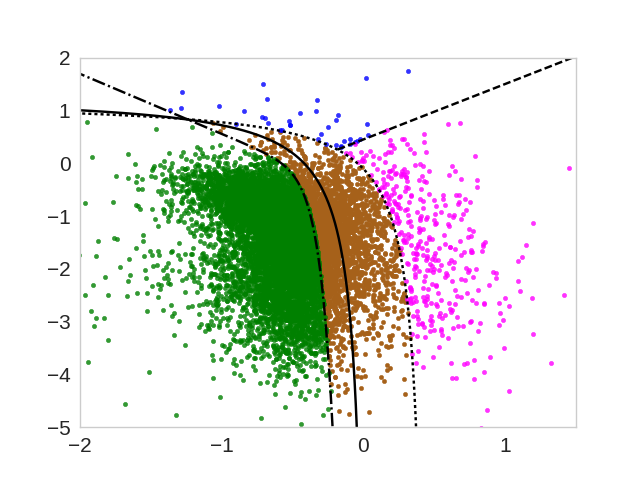

In [76]:
plot_co  = plt.scatter(xbpt[idx_co], ybpt[idx_co], c='#a6611a', s=10, alpha=1)
plot_sf  = plt.scatter(xbpt[idx_sf], ybpt[idx_sf], c='green', s=10, alpha=0.8)
plot_sy  = plt.scatter(xbpt[idx_sy], ybpt[idx_sy], c='blue', s=10, alpha=0.8)
plot_ln  = plt.scatter(xbpt[idx_ln], ybpt[idx_ln], c='magenta', s=10, alpha=0.8)
# plot_na  = plt.scatter(xbpt[idx_na], ybpt[idx_na], c='red', s=10, alpha=1)
plot02, = plt.plot(xbpt_k01, ybpt_k01, ':', color='black',  label='Kewley+01')
plot03, = plt.plot(xbpt_k03, ybpt_k03, '-', color='black',  label='Kauffman+03')
plot04, = plt.plot(xbpt_s06, ybpt_s06, '-.', color='black', label='Stasinska+06')
plot05, = plt.plot(xbpt_s07, ybpt_s07, '--', color='black', label='Schawinski+07')
plt.xlim(bpt_xlim)
plt.ylim(bpt_ylim)
plt.minorticks_on()
plt.tick_params('both', labelsize='15')
plt.xticks(np.arange(bpt_xlim[0], bpt_xlim[1], 1.))
plt.grid(alpha=0.0)
plt.show()

##### I now have both classifications: UV and BPT. Let's crossmatch these informations and count the amount of galaxies in each situation.

In [78]:
idxx_sf = np.where(bpt_class=='SF')
idxx_sy = np.where(bpt_class=='Seyfert')
idxx_ln = np.where(bpt_class=='LINER')
idxx_co = np.where(bpt_class=='Composite')

In [79]:
print "UV Classification & SF & Seyfert & LINER & Composite \\"
print "RSF               & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_sy]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_ln]).count('RSF'), 
                                                         list(uv_class_bpt[idxx_co]).count('RSF'))
print "UV weak           & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_sy]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_ln]).count('UV_WEAK'), 
                                                         list(uv_class_bpt[idxx_co]).count('UV_WEAK'))
print "UV upturn         & %d & %d   & %d   & %d \\ " % (list(uv_class_bpt[idxx_sf]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_sy]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_ln]).count('UV_UPTURN'), 
                                                         list(uv_class_bpt[idxx_co]).count('UV_UPTURN'))

UV Classification & SF & Seyfert & LINER & Composite \
RSF               & 11059 & 38   & 267   & 2393 \ 
UV weak           & 117 & 1   & 56   & 98 \ 
UV upturn         & 91 & 0   & 45   & 52 \ 


# Now we are evaluating the impact of UV upturn sources in redshift

In [81]:
bins = np.arange(0, (redshift[index_all]).max(), 0.05)
ratio_uvup_redseq = []
average_redshift = []
z_uv = []
z_rs = []
redshift_uvup = redshift[index_uvup]

for i in range(bins.size):
    if i==0:
        continue
    else:
        index_redseq_i = np.where((bins[i-1] <= redshift[index_redsequence]) * (redshift[index_redsequence] <= bins[i]))
        index_uvup_i = np.where((bins[i-1] <= redshift_uvup) * (redshift_uvup <= bins[i]))
        redshift_bin_redseq = redshift[index_redseq_i]
        redshift_bin_uvup   = redshift_uvup[index_uvup_i]
        if (redshift_bin_redseq.size==0):
            ratio_uvup_i = 0
            print "There are no UV Upturn galaxies in this range of redshift: %.2f and %.2f" % (bins[i-1], bins[i])
        else:
            ratio_uvup_i = (np.float(redshift_bin_uvup.size) / np.float(redshift_bin_redseq.size)) *100
            average_redshift_i = np.average((bins[i], bins[i-1]))
            average_redshift.append(average_redshift_i)
        z_uv.append(redshift_bin_uvup.size)
        z_rs.append(redshift_bin_redseq.size)
        ratio_uvup_redseq.append(ratio_uvup_i)
ratio_uvup_redseq = np.array(ratio_uvup_redseq)
z_uv = np.array(z_uv)
z_rs = np.array(z_rs)
average_redshift  = np.array(average_redshift)

There are no UV Upturn galaxies in this range of redshift: 0.00 and 0.05
There are no UV Upturn galaxies in this range of redshift: 0.45 and 0.50
There are no UV Upturn galaxies in this range of redshift: 0.50 and 0.55
There are no UV Upturn galaxies in this range of redshift: 0.60 and 0.65
There are no UV Upturn galaxies in this range of redshift: 0.65 and 0.70
There are no UV Upturn galaxies in this range of redshift: 0.70 and 0.75
There are no UV Upturn galaxies in this range of redshift: 0.75 and 0.80
There are no UV Upturn galaxies in this range of redshift: 0.80 and 0.85
There are no UV Upturn galaxies in this range of redshift: 0.85 and 0.90
There are no UV Upturn galaxies in this range of redshift: 0.90 and 0.95
There are no UV Upturn galaxies in this range of redshift: 0.95 and 1.00
There are no UV Upturn galaxies in this range of redshift: 1.00 and 1.05
There are no UV Upturn galaxies in this range of redshift: 1.05 and 1.10
There are no UV Upturn galaxies in this range of re

<IPython.core.display.Javascript object>


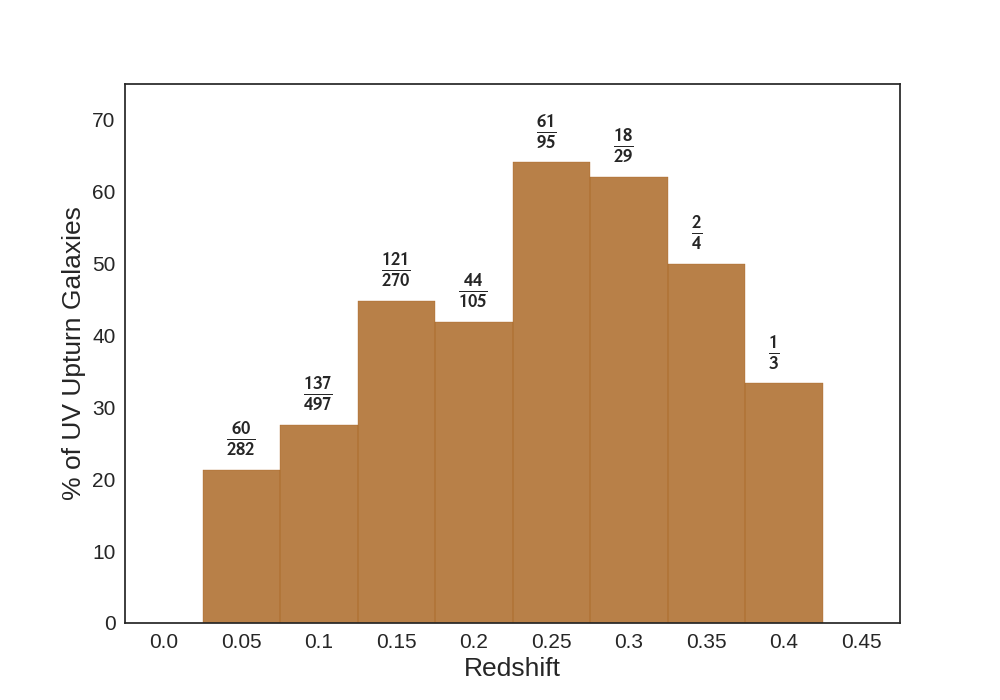

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 27 but corresponding boolean dimension is 26
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 27 but corresponding boolean dimension is 26
  


In [109]:
n_groups = bins.size
index = np.arange(1,n_groups,1)
sns.set_style('white')
plt.subplots(1,1, figsize=(10,7))
plt.bar(index[[ratio_uvup_redseq!=0]], ratio_uvup_redseq[[ratio_uvup_redseq!=0]], width=1., alpha=0.8, 
        color='#a6611a', edgecolor='#a6611a')
for i in range(bins[[ratio_uvup_redseq!=0]].size):
    plt.text(index[i+1]-0.2, ratio_uvup_redseq[i+1]+3.5, r"$\mathbf{\frac{%4d}{%4d}}$" % (z_uv[i+1], z_rs[i+1]), 
             fontsize=19)
plt.xticks(index, bins)
plt.ylabel("% of UV Upturn Galaxies", fontsize=19)
plt.xlabel("Redshift", fontsize=19)
plt.tick_params('both', labelsize='15')
plt.xlim(0.5, bins[[ratio_uvup_redseq!=0]].size +2.5)
plt.ylim(0, 75)
plt.rcParams['mathtext.fontset'] = u'stixsans'
plt.savefig('../Figs/g2_barplot_uvred.pdf')
plt.savefig('../Figs/g2_barplot_uvred.png')
plt.show()